
#### The finite differences algorithm for the heat equation.

$$T(x,t+\Delta t)=T(x,t)+\frac{\alpha}{C}\left[T(x+\Delta x,t)+T(x-\Delta x,t)
-2T(x,t) \right], 
$$ with the constant $C=(\Delta x)^2/\Delta t$.


The stability condition for a numerical solution of the 1D heat equation is given by
$$\alpha\frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}$$ or $$\alpha\frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{4}$$ for the 2D heat equation. 

### Exercise 1: Finite differences program 

Solve the temperature distribution within an iron bar of length $l=50$cm
with the boundary conditions $$T(x=0,t)=T(x=l,t)=0,$$ and initial
conditions $$T(x,t=0)=100^{\circ}\mathrm{C}.$$ The corresponding
constants for iron are:
$$c=0.113 \mathrm{cal/(g^{\circ} C)},\,\, K=0.12 \mathrm{cal/(sg^{\circ}C)},
\,\,\rho=7.8 \mathrm{g/cc}.$$

1.  Write the program to solve the heat flow equation using the finite
    differences method

2.  Plot the temperature gradient along the bar at different instants
    of time. Use 100 space divisions for the calculation. Choose an
    appropiate time step such that the numerical solution is stable.
    Check that the temperature diverges with time as the constant $c$ is
    made larger that $0.5$.

3.  Repeat the calculation for aluminum, $c=0.217cal/(g^{\circ}C)$,
    $K=0.49
    cal/(g^{\circ}C)$, $\rho=2.7g/cc$. Note that the stability condition
    requires you to change the size of the time step.

4.  Analyze and compare the results for both materials. The shape of the
    curves may be the same but not the scale. Which bar cools faster and
    why?

5.  Pick a sinusoidal initial gradient: $$T(x,t=0)=\sin{(\pi x/l)}.$$
    Compare with the analytic solution
    $$T(x,t)=\sin{(\frac{\pi x}{l})}e^{\pi^2\alpha t/l^2}.$$



In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

## Parameters for iron bar
K = 0.12
c = 0.113
rho = 7.8
alpha = K/c/rho

l = 50    #length of the bar
dx = 0.5  # space step
nx = int(l/dx)  # number of points in space
x = np.arange(0,l+dx,dx) # the +1 is necessary to store the value at l
dt = 0.1
C = dx**2/dt
r = alpha/C

print(r)

0.05445881552076241


Time starts at t=0s and ends at t=200.0s


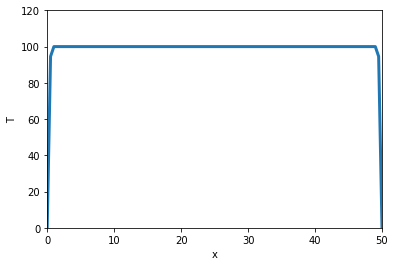

In [6]:
t0 = np.zeros(nx+1)
t1 = np.zeros(nx+1) # these arrays will contain the new displacements at t, and t+delta

#Initial conditions
t0[:] = 100.
t0[0] = 0.
t0[nx] = 0.


fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(0, 120), xlabel='x', ylabel='T')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)

def evolve(i):
    
    ## t0 is temp file at time t, updated at the end of every loop,
    ##    and finally used to plot
    ## t1 is temp file at time t+dt, passed to t0 at the end of every loop,
    ##    only lives in the loop
    
    global t0, t1

    for ix in range(1,nx):
        t1[ix] = t0[ix] + r*(t0[ix+1]+t0[ix-1]-2*t0[ix])  

    points.set_data(x, t0)

    for ix in range(nx):
        t0[ix] = t1[ix]       

    return points

## How FuncAnimation(fig, evolve, frames = 2000, interval=10) works?
##   'frames' is the number of slices in time dimension
##   call function 'evolve' and plot 'fig' and repeat 2000 times
##   similar as  
##   for i in range(2000): evolve(i)
##   'interval' is time delay(in milliseconds) between frames

## Here we plot from t=0 to t=dt*2000=1000

N = 2000
anim1 = animation.FuncAnimation(fig, evolve, frames = N, interval=10)
print('Time starts at t=0s and ends at t={}s'.format(dt*N))

#for i in range(2000):
#    evolve(i)   
#plt.plot(x, t0, color='blue', ls='-', lw=3);

In [7]:
#display_animation(anim1, default_mode='once')

### If we set dt=1, make constant larger than 0.5

In [8]:
dt = 1
C = dx**2/dt
r = alpha/C

print(r)

0.5445881552076242


Time starts at t=0s and ends at t=2000s


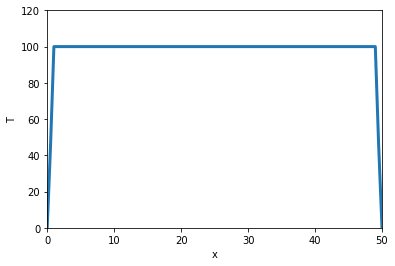

In [9]:
t0 = np.zeros(nx+1)
t1 = np.zeros(nx+1)

t0[:] = 100.
t0[0] = 0.
t0[nx] = 0.

fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(0, 120), xlabel='x', ylabel='T')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)

def evolve(i):
    
    global t0, t1

    for ix in range(1,nx):
        t1[ix] = t0[ix] + r*(t0[ix+1]+t0[ix-1]-2*t0[ix])  

    points.set_data(x, t0)

    for ix in range(nx):
        t0[ix] = t1[ix]       

    return points

N = 2000
anim2 = animation.FuncAnimation(fig, evolve, frames = N, interval=10)
print('Time starts at t=0s and ends at t={}s'.format(dt*N))



In [10]:
#display_animation(anim2, default_mode='once')

### Repeat for Aluminum(different set of parmateters and dt)

In [11]:
## Parameters for aluminum bar
K = 0.49
c = 0.217
rho = 2.7
alpha = K/c/rho

l = 50    #length of the bar
dx = 0.5  # space step
nx = int(l/dx)  # number of points in space
x = np.arange(0,l+dx,dx) # the +1 is necessary to store the value at l
dt = 0.1
C = dx**2/dt
r = alpha/C

print(r)

0.33452807646356025


Time starts at t=0s and ends at t=200.0s


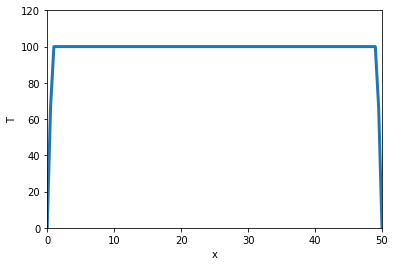

In [12]:
t0 = np.zeros(nx+1)
t1 = np.zeros(nx+1)

t0[:] = 100.
t0[0] = 0.
t0[nx] = 0.

fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(0, 120), xlabel='x', ylabel='T')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)

def evolve(i):
    
    global t0, t1

    for ix in range(1,nx):
        t1[ix] = t0[ix] + r*(t0[ix+1]+t0[ix-1]-2*t0[ix])  

    points.set_data(x, t0)

    for ix in range(nx):
        t0[ix] = t1[ix]       

    return points

N = 2000
anim3 = animation.FuncAnimation(fig, evolve, frames = N, interval=10)
print('Time starts at t=0s and ends at t={}s'.format(dt*N))


In [13]:
#display_animation(anim3, default_mode='once')

We plotted the temperature file Fe bar and Al bar in the same time scale: both from 0 to 200s. At t=200s, the middle part of Fe bar still stays at 100 degree, while in the same position for Al bar it's already down to 70. So Al bar cools faster than Fe bar.

### Sinusoidal initial gradient: $$T(x,t=0)=\sin{(\pi x/l)}.$$
Analytic solution
    $$T(x,t)=\sin{(\frac{\pi x}{l})}e^{\pi^2\alpha t/l^2}.$$

Let's choose Al bar to calculate:

In [14]:
K = 0.49
c = 0.217
rho = 2.7
alpha = K/c/rho

l = 50    #length of the bar
dx = 0.5  # space step
nx = int(l/dx)  # number of points in space
x = np.arange(0,l+dx,dx) # the +1 is necessary to store the value at l
dt = 0.1
C = dx**2/dt
r = alpha/C

print(r)

0.33452807646356025


Time starts at t=0s and ends at t=200.0s


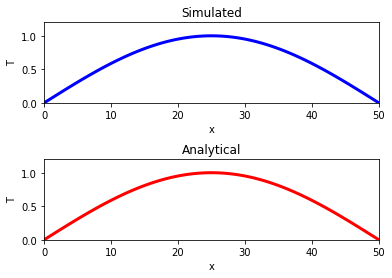

In [15]:
t0 = np.zeros(nx+1)
t1 = np.zeros(nx+1)
t0_aly = np.zeros(nx+1)
t1_aly = np.zeros(nx+1)

t0[:] = np.sin(np.pi*x/l)
t0[0] = 0.
t0[nx] = 0.

t0_aly = t0

fig, (ax1,ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7)
ax1.set_title('Simulated')
ax1.set_xlabel('x')
ax1.set_ylabel('T')
ax1.axis([0,50,0,1.2])
ax2.set_title('Analytical')
ax2.set_xlabel('x')
ax2.set_ylabel('T')
ax2.axis([0,50,0,1.2])
points, = ax1.plot([], [], 'b', marker='', linestyle='-', lw=3)
points_aly, = ax2.plot([], [], 'r', marker='', linestyle='-', lw=3)

def evolve(i):
    
    global t0, t1, t0_aly, t1_aly

    for ix in range(1,nx):
        t1[ix] = t0[ix] + r*(t0[ix+1]+t0[ix-1]-2*t0[ix]) 
        t1_aly[ix] = np.sin(np.pi*dx*ix/l)*np.exp(-np.pi**2*alpha*dt*(i+1)/l**2)

    points.set_data(x, t0)
    points_aly.set_data(x,t0_aly)

    for ix in range(nx):
        t0[ix] = t1[ix]
        t0_aly[ix] = t1_aly[ix]

    return points, points_aly

N = 2000
anim4 = animation.FuncAnimation(fig, evolve, frames = N, interval=10)
print('Time starts at t=0s and ends at t={}s'.format(dt*N))


In [16]:
#display_animation(anim4, default_mode='once')

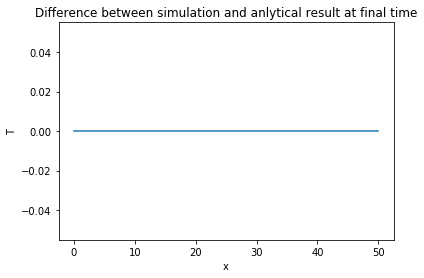

In [17]:
plt.figure()
plt.plot(x,t0_aly-t0)
plt.xlabel('x')
plt.ylabel('T')
plt.title('Difference between simulation and anlytical result at final time')
plt.show()